# 👽 COSADAMA Into to Data Science Study

- 일자: 2020-08-07
- 작성자: 조용주 👽
- 참고자료: 파이썬으로 데이터 주무르기(민형기)

## 4. 셀프 주유소는 정말 저렴할까?

이번주차까지 포기하지 않고 따라와주신 여러분 정말 수고하셨습니다ㅠㅋㅋㅋ 😂 파기문 때와는 비교도 되지 않는 화려한 툴들을 만지느라 진이 빠지셨을 것 같기도 하고,
신기하고 재밌어서 더 의욕이 생기셨을 것 같기도 해요. 저는 한 6:4의 마음이었던 것 같은데, 여러분들은 어떠신가요ㅠㅋㅋㅋ
    
이번주차에는 그동안 배운 것들을 한꺼번에 사용하는 무시무시한 프로젝트가 기다리고 있답니다!
대신 새로 배우는 툴은 selenium이라는 크롤링 툴 밖에 없으니 시작하기 전에 지난주차 내용 짧게 복습해보시고 시작해보면 좋을 것 같아요.

궁금한 건 언제나 멘토 혹은 슬랙채널을 통해 질문해주세요! 그럼 이번주차도 시작합니다 😃👽

### 4.1 Selenium

이번 시간엔 opinet이라는 사이트를 통해 크롤링을 해볼 거에요. 이 사이트에서 싼 주유소 찾기를 누른 후 지역을 골라주면 우리가 얻고자 하는 정보가 있는 페이지가 나와요.
문제는 이렇게 지역별 사이트에 들어가도 url이 그대로이기 때문에 다시 로드해도 opinet 처음 페이지로 돌아가게 된다는 거죠. 이땐 url만을 통해 크롤링하는 urllib 사용이 불가능하겠죠?
이럴 때 사용하는 게 selenium이랍니다.

#### selenium 설치

selenium은 pip install selenium 코드를 통해 설치하시면 돼요. selenium을 사용하기 위해선 웹드라이버도 설치를 해야하는데, 이건 자신이 사용하는 브라우저에 맞는 웹드라이버를 설치하시면 돼요.

[본인에게 맞는 웹브라우저 별로 드라이브 설치 - 경로설정 주의](https://sacko.tistory.com/13)

기왕이면 크롬 웹드라이버 설치를 추천드려요. 크롬 개발자 도구 사용을 위해 가장 대중적으로 이용하는 웹드라이버입니다.
맥 사용하시는 분들은 기본 브라우저인 사파리에 웹드라이버가 기본 내장되어 있기는 하지만, 오류가 잦아서 꼭 크롬 웹드라이버를 따로 설치해주셔야 합니다.

웹드라이버를 다운 받으신 후 data나 소스코드가 있는 폴더에 드라이브를 압축해제해주시면 돼요. 웹드라이버 사용을 위해서는 파일 경로를 알아둬야 하는데요, 드라이버를 터미널에 드래그하시면 아래 같은 코드가 떠요. 그게 드라이버의 파일 경로이니 잘 복사해두세요!

![웹드라이버](images/000.png)

In [2]:
# 하람 노트북 경로상의 문제라 여러분들은 이 코드 생략하세요! 
import sys
sys.path.append("/usr/local/lib/python3.8/site-packages")

In [1]:
!pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
from selenium import webdriver

In [3]:
driver = webdriver.Chrome('/Users/penielcho/Documents/chromedriver')
#이때 ()안에 들어가는 파일 경로는 당연히 제 웹 드라이버의 파일 경로니까 똑같이 하시면 안됩니당.
driver.get("https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com")

#### Selenium으로 NAVER 로그인 하기

갑자기 새로운 화면이 뜨죠? 위에 'Chrome이 자동화된 테스트 소프트웨어에 의해 제어되고 있습니다.'라고 하는게 뜨면 잘 된 것이랍니다. 웬만하면 이 화면은 직접 건들이지 않고, Selenium이 만지게 하는게 좋아요.(코드를 작성할 때 혼선이 생길 수 있기 때문)
스크린샷을 하고 싶다면 아래와 같은 명령을 사용하면 됩니다.

In [ ]:
driver.save_screenshot('001.png')

![네이버_로그인_창](images/001.png)

그러면 이런 이미지가 저장이 될 거에요.

이젠 로그인을 해봐야겠죠? 로그인을 위해서는 크롬 개발자 도구를 사용해 아이디와 패스워드가 적힌 곳의 html id를 알아야 해요. 이번에는 find_element_by_id를 사용해 id를 찾을 거에요.

In [4]:
elem_login = driver.find_element_by_id("id")
elem_login.clear() #미리 입력된 글자를 지워주는 코드에요.
elem_login.send_keys("********") #당연히 여러분의 아이디를 적어주셔야 해요!

elem_login = driver.find_element_by_id("pw")
elem_login.clear()
elem_login.send_keys("********")

![네이버_로그인_창](images/002.png)

그러면 이렇게 아이디와 비밀번호가 적힐거에요. 이젠 로그인 버튼을 눌러야겠죠? 이걸 위해선 xpath를 찾아서 클릭해줘야 해요. xpath 역시 크롬 개발자 도구를 통해 알아내실 수 있어요.

In [5]:
xpath = """//*[@id="log.login"]"""
driver.find_element_by_xpath(xpath).click()

![네이버_로그인_창](images/003.png)

오엠지. 캡차가 떠버렸네요! 저희같이 자동으로 로그인하는 걸 막기 위해 의심되는 로그인을 재인증시키는 방식이에요. 사실 캡차도 컴퓨터를 학습시키면 뚫을 수 있긴 하지만, 현재 저희로서는 불가능하니 넘어갑시다ㅎㅎ

#### Selenium으로 다음카카오 로그인하기

대신 캡차가 없는 다음카카오에 로그인 해봅시다. 앞서 로그인하는 방법을 알았으니 이번엔 교안 코드를 보기 전에 코드를 먼저 작성해보세요!

[다음카카오 로그인 사이트](https://accounts.kakao.com/login?continue=https%3A%2F%2Flogins.daum.net%2Faccounts%2Fksso.do%3Frescue%3Dtrue%26url%3Dhttps%253A%252F%252Fwww.daum.net%252F)

In [6]:
from selenium import webdriver
import time

driver = webdriver.Chrome('/Users/penielcho/Documents/chromedriver')
driver.get("https://accounts.kakao.com/login?continue=https%3A%2F%2Flogins.daum.net%2Faccounts%2Fksso.do%3Frescue%3Dtrue%26url%3Dhttps%253A%252F%252Fwww.daum.net%252F")

elem_login = driver.find_element_by_id("id_email_2")
elem_login.clear()
elem_login.send_keys("********")
time.sleep(3)

elem_login = driver.find_element_by_id("id_password_3")
elem_login.clear()
elem_login.send_keys("********")
time.sleep(3)

xpath = """//*[@id="login-form"]/fieldset/div[8]/button"""
driver.find_element_by_xpath(xpath).click()

![다음_로그인_창](images/004.png)

이렇게 되면 성공입니다!

#### 다음카카오 메일 사용자 정보 얻기

이젠 메일에 들어가 메일 보낸 사람들을 크롤링해볼 거에요. 그러려면 메일 사이트로 들어가야겠죠? xpath를 사용할 수도 있지만, 아래처럼 바로 메일 사이트에 접근 가능해요.

In [7]:
driver.get("https://mail.daum.net/")

![다음_메일](images/005.png)

ㅎㅎ,,, 민망할 정도로 메일이 없네용,, 지메일을 위주로 사용하다보니^^
이젠 BeautifulSoup을 통해 가공해줍시다.

In [8]:
from bs4 import BeautifulSoup

html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

크롬 개발자 도구를 사용해 태그와 클래스도 알아보신 후 find_all로 모두 가져와 봅시다.

꼭 직접 찾아보셔야 해요!

In [9]:
raw_list=soup.find_all('a','link_from')
raw_list

[<a class="link_from" href="javascript:;" title='"Kakao" &lt;noreply@kakao.com&gt;'>Kakao</a>,
 <a class="link_from" href="javascript:;" title='"Daum_팁_매니저" &lt;noreply_tip@kakaocorp.com&gt;'>Daum_팁_매니저</a>,
 <a class="link_from" href="javascript:;" title='"Daum고객센터" &lt;notice-master@daum.net&gt;'>Daum고객센터</a>,
 <a class="link_from" href="javascript:;" title='"스토리펀딩" &lt;storyfunding@kakao.com&gt;'>스토리펀딩</a>,
 <a class="link_from" href="javascript:;" title='"Kakao" &lt;noreply@kakao.com&gt;'>Kakao</a>,
 <a class="link_from" href="javascript:;" title='"Daum고객센터" &lt;notice-master@daum.net&gt;'>Daum고객센터</a>,
 <a class="link_from" href="javascript:;" title='"Kakao" &lt;noreply@kakao.com&gt;'>Kakao</a>,
 <a class="link_from" href="javascript:;" title='"Daum캐쉬 담당자" &lt;notice-master@daum.net&gt;'>Daum캐쉬 담당자</a>,
 <a class="link_from" href="javascript:;" title='"Daum" &lt;notice-master@daum.net&gt;'>Daum</a>,
 <a class="link_from" href="javascript:;" title='"다음메일" &lt;notice-master@daum.net

사용자 이름만 뽑으려면 아래 코드를 사용하면 되겠죠?

In [10]:
raw_list[0].get_text()

'Kakao'

for문을 통해 메일 보낸 사용자 이름을 모두 가져와 봅시다.

In [11]:
for n in range(0,len(raw_list)):
    send_list=raw_list[n].get_text()
    print(send_list)

Kakao
Daum_팁_매니저
Daum고객센터
스토리펀딩
Kakao
Daum고객센터
Kakao
Daum캐쉬 담당자
Daum
다음메일


얻을 정보는 다 얻었으니 driver를 종료합시다.

In [12]:
driver.close()

수고하셨어요! 잠깐 몸 좀 풀고 오세요!
이제 진짜 프로젝트를 시작해봅시당ㅎㅎ 😘

### 4.2 서울시 구별 주유소 가격 정보 얻기

[opinet-싼 주유소 찾기-지역별](http://www.opinet.co.kr/searRgSelect.do)

Selenium으로 위 사이트에 들어가 볼까요?

In [13]:
driver=webdriver.Chrome('/Users/penielcho/Documents/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")
driver.get("http://www.opinet.co.kr/searRgSelect.do")
#두번 해야 들어가져요.

![오피넷](images/006.png)

들어가졌죠?

이제부터가 문제인데, 저희는 서울시 구별로 정보를 얻어야 해요. 그런데 위 사진처럼 비서울 거주자 분들은 지역이 서울로 설정되지 않으실 수 있어요. 만약 자신은 서울로 기본 설정이 되있다면 아래 코드들을 굳이 실행시키실 필요 없이 한번 훑어만 주시고, 그렇지 않다면 저를 따라 시 설정을 변경해봅시다.

++서울 설정 되신 분들도 따라해도 문제는 없으니 웬만하면 따라 해주세요!

먼저 도를 바꿔야 해요. 경기도가 아닌 서울특별시로 바꿔야 하니까요. 이때 필요한 게 위에서 배운 xpath에요. 크롬 개발자 도구로 해당 버튼의 xpath를 copy하고 sido_list_raw 변수에 저장합니다.

Selenium 문법이 더 궁금하신 분들은 아래 링크를 통해 추가적으로 공부하셔도 돼요.
[Selemnium 문법](https://github.com/SeongJaeMoon/PracPython/blob/master/selenium_dom_selector.md)

In [14]:
sido_list_raw = driver.find_element_by_xpath("""//*[@id="SIDO_NM0"]""")

이후에는 도/시 이름이 option 태그에 저장돼 있으니 아래와 같이 option 태그를 찾아줄 거에요.

In [15]:
sido_list=sido_list_raw.find_elements_by_tag_name("option")
sido_list[:5]

[<selenium.webdriver.remote.webelement.WebElement (session="9e3101d3ecb0cd2135fb2a63b966c37c", element="d76c3ef9-aba0-41ea-b878-cb2d4fd38164")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9e3101d3ecb0cd2135fb2a63b966c37c", element="a8880da9-20b6-4fef-aaae-813a12b59da7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9e3101d3ecb0cd2135fb2a63b966c37c", element="adc9710a-f416-4f16-a50a-acffc050c7fc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9e3101d3ecb0cd2135fb2a63b966c37c", element="0f399814-d650-4c47-96bf-5e9178a52a7d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9e3101d3ecb0cd2135fb2a63b966c37c", element="a0b4acf2-3f98-4474-82be-ecff1846a9dc")>]

sido_list엔 저희가 원하는 게 안 보이네요! 도/시 이름은 option의 value에 있으니 value를 가져와 봅시다.

In [16]:
sido_names=[option.get_attribute("value") for option in sido_list]
sido_names.remove('')
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

저희는 이 중 서울특별시로 도/시를 설정해줘야 하니 sido_names 중에 첫번째를 골라주면 되겠죠?

In [17]:
element=driver.find_element_by_id("SIDO_NM0")
element.send_keys(sido_names[0])

자, 이렇게 서울시로 설정이 완료됐어요!

이젠 도/시 이름을 가져온 것처럼 서울시 구 이름을 가져와 봅시다.

In [19]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list=gu_list_raw.find_elements_by_tag_name("option")
gu_names=[option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

구 개수를 세볼까요?

In [20]:
len(gu_names)

25

25구, 맞네요.

아까 서울시를 클릭했던 것처럼 이번엔 강남구를 선택해봅시다.

In [21]:
element_s=driver.find_element_by_id("SIGUNGU_NM0")
element_s.send_keys(gu_names[0])

![강남구](images/009.png)

잘 설정됐죠? 이젠 조회 버튼을 눌러봅시다.
xpath를 사용해주세요.

In [23]:
xpath='''//*[@id="searRgSelect"]/span'''
element_sel_gu=driver.find_element_by_xpath(xpath).click()

이젠 아래 엑셀 저장 버튼을 눌러줘야 해요.
똑같이 xpath를 알아내서 클릭해주세요!

In [24]:
xpath ='''//*[@id="glopopd_excel"]/span'''
element_get_excel = driver.find_element_by_xpath(xpath).click()

![다운로드](images/007.png)

평소 다운로드하는 폴더에 이렇게 쏙 저장이 되면 완료!

그렇다면 이젠 전체 구들의 엑셀 파일을 모두 가져와볼까요? 시간이 꽤 오래 걸리는 작업이라서 tqdm을 사용해 걸리는 시간을 시각화해볼 거에요. 코드가 어떻게 구성될지 고민해보신 후 아래 교안을 봐주세요.

+아래 코드 실행 전에 아까 다운한 강남구 파일은 삭제해주세요. 헷갈리니까요!

In [25]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element=driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath='''//*[@id="searRgSelect"]/span'''
    element_sel_gu=driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath ='''//*[@id="glopopd_excel"]/span'''
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

/Users/penielcho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


ㅎㅎㅎ,,, 정말 오래 걸리죠? 근데 파일이 25개가 아닌 분들도 계실 거에요. 전 집에서는 25개 모두 다운로드가 되는데 카페에서는 꼭 3-4개씩 빠지더라고요. 인터넷 신호 영향을 많이 받는 것 같아요. 웬만하면 와이파이 빵빵한 곳에서 실행하시길 추천드려요. 혹시 어쩔 수 없는 분들은 마지막 타임 슬립 코드(엑셀 다운로드 하는 xpath를 붙여넣은 코드 밑에!) 숫자를 늘려주세요. 다운이 시작되기 전에 다음 페이지로 넘어가서 다운로드 과정이 캔슬되는 것일 수 있거든요. 교안엔 1초로 적어뒀지만 계속 실패한다 하시는 분들은 3 정도로 늘려주시면 될 것 같아요.

![다운로드](images/008.png)

이렇게 25개 파일 모두 저장되었으면 성공! 다운한 25개 파일은 현재 작성하고 있는 주피터 노트북 파일이 위치한 폴더로 옮겨주세요. 저는 data라는 폴더를 따로 만들어서 넣어뒀어요.

### 4.3 구별 주유 가격에 대한 데이터 정리

이젠 구별 주유 가격에 대한 데이터를 정리해볼 거에요. pandas를 사용해봅시다.

In [26]:
import pandas as pd
from glob import glob

glob을 이용하면 쉽게 파일을 가져올 수 있어요. 아래 *는 지역으로 시작하는 것은 모두 가져오라는 거에요. 지역 뒤 이름은 상관이 없는 거죠.

[glob 사용법](https://wikidocs.net/83)

In [27]:
glob('data/지역*.xls')

['data/지역_위치별(주유소) (9).xls',
 'data/지역_위치별(주유소) (12).xls',
 'data/지역_위치별(주유소) (5).xls',
 'data/지역_위치별(주유소) (24).xls',
 'data/지역_위치별(주유소) (4).xls',
 'data/지역_위치별(주유소) (13).xls',
 'data/지역_위치별(주유소) (8).xls',
 'data/지역_위치별(주유소) (3).xls',
 'data/지역_위치별(주유소) (18).xls',
 'data/지역_위치별(주유소) (22).xls',
 'data/지역_위치별(주유소) (14).xls',
 'data/지역_위치별(주유소) (15).xls',
 'data/지역_위치별(주유소) (23).xls',
 'data/지역_위치별(주유소) (19).xls',
 'data/지역_위치별(주유소) (2).xls',
 'data/지역_위치별(주유소) (20).xls',
 'data/지역_위치별(주유소) (1).xls',
 'data/지역_위치별(주유소) (16).xls',
 'data/지역_위치별(주유소) (17).xls',
 'data/지역_위치별(주유소) (21).xls',
 'data/지역_위치별(주유소) (10).xls',
 'data/지역_위치별(주유소).xls',
 'data/지역_위치별(주유소) (7).xls',
 'data/지역_위치별(주유소) (6).xls',
 'data/지역_위치별(주유소) (11).xls']

In [28]:
len(glob('data/지역*'))

25

25개 맞네요! 그럼 이제 이걸 모두 file에다 저장해볼게요.

In [29]:
stations_files=glob('data/지역*.xls')
stations_files

['data/지역_위치별(주유소) (9).xls',
 'data/지역_위치별(주유소) (12).xls',
 'data/지역_위치별(주유소) (5).xls',
 'data/지역_위치별(주유소) (24).xls',
 'data/지역_위치별(주유소) (4).xls',
 'data/지역_위치별(주유소) (13).xls',
 'data/지역_위치별(주유소) (8).xls',
 'data/지역_위치별(주유소) (3).xls',
 'data/지역_위치별(주유소) (18).xls',
 'data/지역_위치별(주유소) (22).xls',
 'data/지역_위치별(주유소) (14).xls',
 'data/지역_위치별(주유소) (15).xls',
 'data/지역_위치별(주유소) (23).xls',
 'data/지역_위치별(주유소) (19).xls',
 'data/지역_위치별(주유소) (2).xls',
 'data/지역_위치별(주유소) (20).xls',
 'data/지역_위치별(주유소) (1).xls',
 'data/지역_위치별(주유소) (16).xls',
 'data/지역_위치별(주유소) (17).xls',
 'data/지역_위치별(주유소) (21).xls',
 'data/지역_위치별(주유소) (10).xls',
 'data/지역_위치별(주유소).xls',
 'data/지역_위치별(주유소) (7).xls',
 'data/지역_위치별(주유소) (6).xls',
 'data/지역_위치별(주유소) (11).xls']

#### 25개 파일 병함

pandas로 가공하기 위해선 이 25개 파일들을 하나의 DataFrame에 담아야 해요. 이를 위해서 열 방향으로 합쳐지는 concat 함수를 이용할 거에요.

In [30]:
tmp_raw=[] #25개 DataFrame이 담길 리스트

for file_name in stations_files:
    tmp=pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp) #tmp_raw에 추가

station_raw=pd.concat(tmp_raw) #25개 DataFrame 병합
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1335,1135,840
1,서울특별시,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),현대오일뱅크,02-902-5189,N,-,1335,1135,-
2,서울특별시,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),SK에너지,02-992-5561,Y,-,1337,1137,1100
3,서울특별시,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),S-OIL,02-996-6640,Y,-,1355,1155,-
4,서울특별시,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),SK에너지,02-996-5151,Y,-,1355,1155,-


익숙한 DataFrame 모양이 나왔죠? 저희 프로젝트 주제가 셀프 주유소가 정말 싼가? 이기 때문에 그에 맞는 데이터만 가져와 볼 거에요.

In [31]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      501 non-null    object
 1   상호      501 non-null    object
 2   주소      501 non-null    object
 3   상표      501 non-null    object
 4   전화번호    501 non-null    object
 5   셀프여부    501 non-null    object
 6   고급휘발유   501 non-null    object
 7   휘발유     501 non-null    object
 8   경유      501 non-null    object
 9   실내등유    501 non-null    object
dtypes: object(10)
memory usage: 43.1+ KB


필요한 칼럼들만 추려 stations에 담아볼게요. 필요한 칼럼들은 상호, 주소, 휘발유, 셀프여부, 상표에요.

In [33]:
stations=pd.DataFrame({'Oil_store':station_raw['상호'],
                      '주소':station_raw['주소'],
                      '가격':station_raw['휘발유'],
                      '셀프':station_raw['셀프여부'],
                      '상표':station_raw['상표']})

stations.head()

,Oil_store,주소,가격,셀프,상표
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1335,N,현대오일뱅크
1,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1335,N,현대오일뱅크
2,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1337,Y,SK에너지
3,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),1355,Y,S-OIL
4,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1355,Y,SK에너지


#### 데이터 가공하기

주소 칼럼을 보세요. 너무 길죠? 저희가 필요한 건 구니까 구만 뽑아서 저장해줍시다. split을 통해 쉽게 가져오면 돼요. 새로운 칼럼 구를 만들어주고요!

In [34]:
stations['구']=[eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1335,N,현대오일뱅크,도봉구
1,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1335,N,현대오일뱅크,도봉구
2,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1337,Y,SK에너지,도봉구
3,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),1355,Y,S-OIL,도봉구
4,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1355,Y,SK에너지,도봉구


다 잘 가져와졌는지 unique()를 통해 확인해봅시다!

In [37]:
stations['구'].unique()

array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
       '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
       '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '금정구', '동작구'],
      dtype=object)

이걸 언제 다 보겠어요? 개수를 봅시다.

In [42]:
len(stations['구'].unique())

26

엥? 25개여야 할 구가 26개에요. 뭔가 데이터에 문제가 있네요. 위 unique 코드를 한번 다시 봅시다. 아, '금정구'라는 구가 들어가있네요. 이처럼 데이터에 문제가 있는 경우가 있어요. 이럴 경우 하나하나 손을 봐줘야하죠.

+본 데이터는 8/7 기준으로 여러분이 직접 실습하실 땐 이런 에러가 없을 수 있습니당! 문제 없을 시 그냥 읽고 넘어가 주세요!

먼저 금정구로 설정된 데이터가 얼마나 있는지 한번 봅시다.

In [43]:
stations[stations['구']=='금정구'].head()

,Oil_store,주소,가격,셀프,상표,구
7,현대오일뱅크(주)직영 금사주유소,부산 금정구 반송로 420 (금사동),1369,Y,현대오일뱅크,금정구


하나 밖에 없네요! 금정구는 부산의 구였군요.
저희는 서울의 구가 필요하니 본 데이터는 삭제합니다.

In [46]:
stations=stations[stations['구']!='금정구']
stations[stations['구']=='금정구']

,Oil_store,주소,가격,셀프,상표,구


깔끔하게 삭제됐죠?

In [47]:
len(stations['구'].unique())

25

구 갯수도 드디어 25개로 돌아왔어요. 짝짝짝! 👏🏻

이젠 가격 표시가 안 된 데이터들을 정리해줄 거에요.

In [48]:
stations['가격'].isnull().value_counts()

False    500
Name: 가격, dtype: int64

In [49]:
stations['가격'].unique()

array([1335, 1337, 1355, 1357, 1359, 1369, 1374, 1379, 1382, 1395, 1399,
       1418, 1557, '1397', '1407', '1416', '1418', '1428', '1438', '1458',
       '1584', '1697', '1699', '-', 1345, 1367, 1375, 1387, 1388, 1409,
       1419, 1438, 1449, 1490, 1373, 1389, 1398, 1368, 1404, 1429, 1437,
       1445, 1468, 1477, 1488, 1378, 1380, 1385, 1390, 1598, '1350',
       '1369', '1370', '1384', '1398', '1399', '1413', '1419', '1439',
       '1470', '1480', '1308', '1317', '1333', '1337', '1339', '1344',
       '1346', '1347', '1357', '1367', '1383', '1387', '1394', '1395',
       '1404', '1410', '1415', '1424', '1455', '1456', '1478', '1535',
       '1688', 1316, 1325, 1329, 1348, 1349, 1354, 1364, 1365, 1397, 1589,
       1677, 1430, 1435, 1479, 1498, 1868, 1895, 1960, 1998, '1306',
       '1379', '1396', '1405', '1408', '1414', '1422', '1423', '1425',
       '1442', '1467', '1497', '1539', '1669', '1878', '1897', '1345',
       '1378', '1445', '1448', '1468', '1595', '1675', '1698', '1705

중간에 '-'가 보이시죠? 가격정보가 없는 걸 저렇게 표시한 거에요. 어떤 행이 가격정보가 없는지 인덱싱을 사용해 알아봅시다.

In [50]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구
33,(주)발산주유소,서울 강서구 강서로 291 (내발산동),-,N,현대오일뱅크,강서구
35,전당앞주유소,서울 서초구 남부순환로 2391 (서초동),-,N,SK에너지,서초구
16,현대오일뱅크 성수주유소,서울 성동구 뚝섬로 352 (성수동1가),-,N,현대오일뱅크,성동구
30,성락주유소,서울 영등포구 가마산로 414 (신길동),-,Y,S-OIL,영등포구
23,신동방주유소,서울 성북구 월계로 84 (장위동),-,N,S-OIL,성북구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
39,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
40,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


10개 주유소나 가격이 없네요! 해당 row들을 없애줍시다.

In [51]:
stations=stations[stations['가격']!='-']
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구


잘 없어졌죠?

In [52]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  490 non-null    object
 1   주소         490 non-null    object
 2   가격         490 non-null    object
 3   셀프         490 non-null    object
 4   상표         490 non-null    object
 5   구          490 non-null    object
dtypes: object(6)
memory usage: 26.8+ KB


이젠 가격을 object에서 숫자로 변경해줍시다.

In [58]:
stations['가격'] = stations['가격'].astype('float')
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  490 non-null    object 
 1   주소         490 non-null    object 
 2   가격         490 non-null    float64
 3   셀프         490 non-null    object 
 4   상표         490 non-null    object 
 5   구          490 non-null    object 
dtypes: float64(1), object(5)
memory usage: 26.8+ KB


데이터 가공은 이만하면 된 것 같아요! 이제 제대로 분석해볼까요?

### 4.4  boxplot으로 셀프 주유소 가격 확인하기

셀프 주유소가 정말 저렴한지 boxplot으로 시각화해볼게요. 우선 matplotlib의 한글 문제를 처리하고 필요 모듈들을 import 할게요.

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

셀프 유무에 따른 가격을 확인해봅시다.

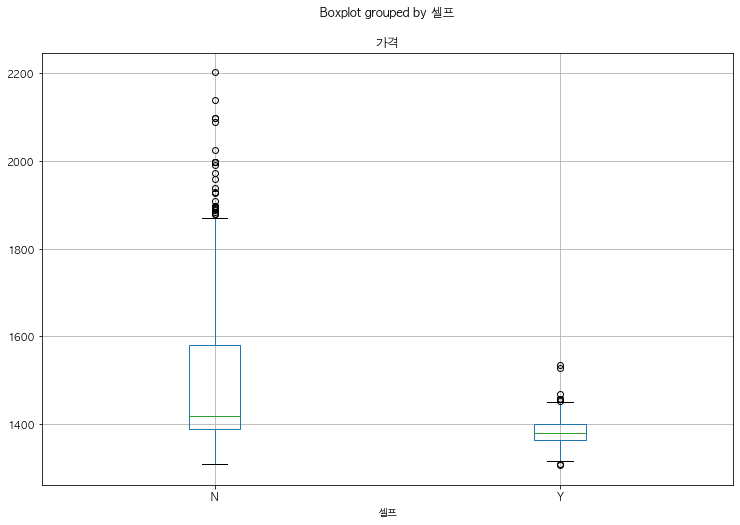

In [60]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

확실히 셀프 주유소가 저렴하죠?

이번엔 상표에 따라 boxplot을 시각화해봅시다.

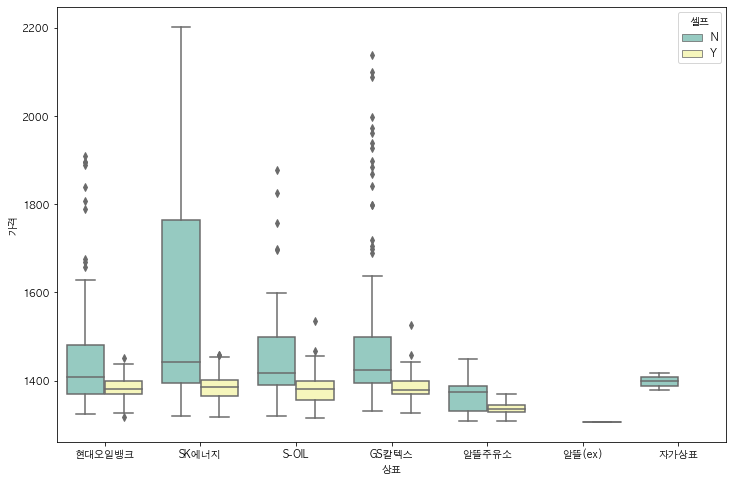

In [61]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

와우, sk에너지가 완전 창렬이네요. 같은 상표라도 셀프 주유소가 더 저렴하게 분포돼있다는 점도 알 수 있고요. 알뜰주유소는 정말 압도적으로 저렴하네요.

셀프 여부를 제외하고 상표로만 boxplot을 봐볼까요?

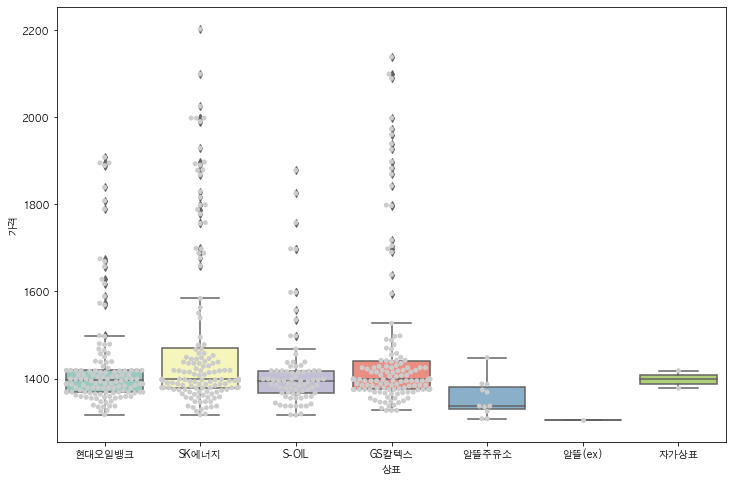

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.8')
plt.show()

결과적으로 '셀프 주유소는 더 저렴한가'는 맞다고 할 수 있겠네요!
이렇게 팩트체크를 완료해봤어요.

### 4.5 서울시 구별 주유 가격 확인

여기까지 하면 조금 아쉽죠? 그래서 구별로 가격의 정도를 시각화 해보려해요. 이전에 사용한 json, folium, googlemaps를 사용해 시각화해줄 거에요. 필요 모듈을 import 합시다.

In [65]:
pip install folium

     |████████████████████████████████| 93 kB 273 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install googlemaps

  Created wheel for googlemaps: filename=googlemaps-4.4.2-py3-none-any.whl size=37856 sha256=bd4faedb1af46d12ec0033b7829f413e20bef09ab266bb24efe0a57e1472ff0c
  Stored in directory: /Users/penielcho/Library/Caches/pip/wheels/7e/30/c7/07c30ff7be3c000ed5f8b2aad1083c8697a2afde133f58b5ca
Successfully built googlemaps
Note: you may need to restart the kernel to use updated packages.


In [71]:
import json
import folium
import googlemaps
import warnings  # futurewarning 뜨지 않도록! 
warnings.simplefilter(action = "ignore", category = FutureWarning)

제일 비싼 곳부터 나열해볼게요. 10개만 가져와 봅시다.

In [72]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
11,서남주유소,서울 중구 통일로 30,2202.0,N,SK에너지,중구
10,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2138.0,N,GS칼텍스,중구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구
9,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2099.0,N,SK에너지,중구
13,서계주유소,서울 용산구 청파로 367 (서계동),2089.0,N,GS칼텍스,용산구
38,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구
11,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
12,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구
8,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구
7,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구


중구, 용산구에 비싼 주유소가 많네요!

학교가 위치한 동작구에서 싼 주유소도 한번 찾아봅시다.

In [74]:
stations[stations['구'] == '동작구'].sort_values(by='가격')

,Oil_store,주소,가격,셀프,상표,구
0,현대오일뱅크㈜직영 신대방셀프주유소,서울 동작구 시흥대로 616 (신대방동),1388.0,Y,현대오일뱅크,동작구
1,지에스칼텍스(주) 대방주유소,서울 동작구 여의대방로 214,1388.0,N,GS칼텍스,동작구
2,창원이엔지주유소,서울 동작구 사당로 59 (상도동),1389.0,N,현대오일뱅크,동작구
3,매일주유소,서울 동작구 상도로 139 (상도동),1399.0,N,S-OIL,동작구
4,현대오일뱅크(주)직영 사당셀프주유소,서울 동작구 동작대로 73 (사당동),1419.0,Y,현대오일뱅크,동작구
5,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1419.0,Y,현대오일뱅크,동작구
6,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1419.0,Y,GS칼텍스,동작구
7,대성산업(주) 노량진주유소,서울 동작구 노량진로 172 (노량진동),1428.0,N,GS칼텍스,동작구
8,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1438.0,N,현대오일뱅크,동작구
9,살피재주유소,서울 동작구 상도로 334,1495.0,N,SK에너지,동작구


오 상도로에 위치한 곳이 3개나 포함돼있네요. 나쁘지 않은 것 같아요!

이번엔 서울 전체에서 가장 저렴한 주유소들을 나열해 볼까요?

In [75]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1306.0,Y,알뜰(ex),서초구
0,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1308.0,N,알뜰주유소,강서구
1,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1308.0,Y,알뜰주유소,강서구
0,현대주유소,서울 양천구 남부순환로 372 (신월동),1316.0,Y,S-OIL,양천구
2,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1317.0,Y,SK에너지,강서구
0,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1317.0,Y,현대오일뱅크,강북구
1,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1317.0,Y,S-OIL,강북구
1,서울석유(주)풀페이주유소,서울 구로구 경인로 41 (온수동),1319.0,N,SK에너지,구로구
0,처음처럼주유소,서울 구로구 오리로 1299 (궁동),1319.0,N,S-OIL,구로구
2,형산석유(주)원주유소,서울 양천구 남부순환로 408,1325.0,N,현대오일뱅크,양천구


와우, 서초구에 위치한 주유소가 가장 저렴하리라곤 상상도 못했어요. 대신 아래로는 다 강서, 강북, 구로구가 차지했네요.

아무래도 구 평균 가격을 봐야할 것 같아요.

In [76]:
import numpy as np 
gu_data = pd.pivot_table(stations, index=['구'], values=["가격"], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1568.794872
강동구,1469.375000
강북구,1359.615385
강서구,1391.272727
관악구,1419.687500


이 값을 지도에 시각화해서 나타내볼까요?

In [78]:
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

이렇게 하니 용산구, 중구, 종로구가 비싼 게 확실하게 보이네요!

### 4.6 서울시 주유 가격 상하위 10개 주유소 지도에 표시하기

이번엔 서울시 주유가격 상하위 10개 주유소를 지도에 표시해볼게요.
구별이 아닌, 개별 주유소 별로 따져보는 거에요. 상하위 10개 주유소만 따로 변수에 담아 볼게요.

In [79]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
11,서남주유소,서울 중구 통일로 30,2202.0,N,SK에너지,중구
10,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2138.0,N,GS칼텍스,중구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구
9,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2099.0,N,SK에너지,중구
13,서계주유소,서울 용산구 청파로 367 (서계동),2089.0,N,GS칼텍스,용산구
38,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구
11,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
12,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구
8,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구
7,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구


In [80]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1306.0,Y,알뜰(ex),서초구
0,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1308.0,N,알뜰주유소,강서구
1,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1308.0,Y,알뜰주유소,강서구
0,현대주유소,서울 양천구 남부순환로 372 (신월동),1316.0,Y,S-OIL,양천구
2,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1317.0,Y,SK에너지,강서구
0,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1317.0,Y,현대오일뱅크,강북구
1,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1317.0,Y,S-OIL,강북구
1,서울석유(주)풀페이주유소,서울 구로구 경인로 41 (온수동),1319.0,N,SK에너지,구로구
0,처음처럼주유소,서울 구로구 오리로 1299 (궁동),1319.0,N,S-OIL,구로구
2,형산석유(주)원주유소,서울 양천구 남부순환로 408,1325.0,N,현대오일뱅크,양천구


지도 시각화를 위해선 위도, 경도가 필요하니 구글맵 api 키를 준비해주세요.

In [81]:
gmaps_key = "*************"
gmaps = googlemaps.Client(key=gmaps_key)

아래 코드를 입력하면 lat과 lng 정보를 모두 담아 oil_price_top10과 oil_price_bottom10에다 새로운 칼럼으로 담아줍니다.

In [82]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    # 주소를 '(' 기준으로 나눠 첫번째 주소만 가져와라 
    tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
    # tmp_add를 기준으로 주소를 입력해라 
    tmp_map = gmaps.geocode(tmp_add)

    # tmp_map의 첫번째 값에서 'geometry'를 구하고, 거기에서 다시 'location'을 구해라
    tmp_loc = tmp_map[0].get('geometry').get('location')
    lat.append(tmp_loc['lat'])
    lng.append(tmp_loc['lng'])

# 각각 새로운 컬럼 형성 
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

/Users/penielcho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,Oil_store,주소,가격,셀프,상표,구,lat,lng
11,서남주유소,서울 중구 통일로 30,2202.0,N,SK에너지,중구,37.559693,126.971120
10,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2138.0,N,GS칼텍스,중구,37.557001,126.974495
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구,37.560850,126.993653
9,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2099.0,N,SK에너지,중구,37.561648,126.997142
13,서계주유소,서울 용산구 청파로 367 (서계동),2089.0,N,GS칼텍스,용산구,37.552290,126.968935
38,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구,37.517636,127.035756
11,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구,37.559693,126.971120
12,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구,37.534657,127.006063
8,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구,37.560850,126.993653
7,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구,37.574464,126.966618


앗 그런데 인덱스가 이상하죠. 8, 11이 2번 들어가 있어요.

In [83]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    # 주소를 '(' 기준으로 나눠 첫번째 주소만 가져와라 
    tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
    # tmp_add를 기준으로 주소를 입력해라 
    tmp_map = gmaps.geocode(tmp_add)

    # tmp_map의 첫번째 값에서 'geometry'를 구하고, 거기에서 다시 'location'을 구해라
    tmp_loc = tmp_map[0].get('geometry').get('location')
    lat.append(tmp_loc['lat'])
    lng.append(tmp_loc['lng'])

# 각각 새로운 컬럼 형성 
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

/Users/penielcho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1306.0,Y,알뜰(ex),서초구,37.459906,127.042060
0,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1308.0,N,알뜰주유소,강서구,37.459906,127.042060
1,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1308.0,Y,알뜰주유소,강서구,37.540657,126.841506
0,현대주유소,서울 양천구 남부순환로 372 (신월동),1316.0,Y,S-OIL,양천구,37.459906,127.042060
2,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1317.0,Y,SK에너지,강서구,37.555284,126.768567
0,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1317.0,Y,현대오일뱅크,강북구,37.459906,127.042060
1,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1317.0,Y,S-OIL,강북구,37.540657,126.841506
1,서울석유(주)풀페이주유소,서울 구로구 경인로 41 (온수동),1319.0,N,SK에너지,구로구,37.540657,126.841506
0,처음처럼주유소,서울 구로구 오리로 1299 (궁동),1319.0,N,S-OIL,구로구,37.459906,127.042060
2,형산석유(주)원주유소,서울 양천구 남부순환로 408,1325.0,N,현대오일뱅크,양천구,37.555284,126.768567


하위 10개도 인덱스가 이상하네요. 병합하는 과정에서 인덱스를 재설정하지 않아서 이런 결과가 나타난 것 같아요. 이러면 이후가 문제가 생기게 돼요. 아래처럼 인덱스 별로 위도와 경도를 뽑아보면, 6번째 값부터 이상하게 추출이 되죠? 그러면 Folium에 넣었을 때 오류가 떠요!

In [84]:
for n in oil_price_top10.index:
    print([oil_price_top10['lat'][n], oil_price_top10['lng'][n]])

[11    37.559693
11    37.559693
Name: lat, dtype: float64, 11    126.97112
11    126.97112
Name: lng, dtype: float64]
[37.5570008, 126.9744945]
[8    37.56085
8    37.56085
Name: lat, dtype: float64, 8    126.993653
8    126.993653
Name: lng, dtype: float64]
[37.5616483, 126.9971419]
[37.5522895, 126.9689354]
[37.51763589999999, 127.0357559]
[11    37.559693
11    37.559693
Name: lat, dtype: float64, 11    126.97112
11    126.97112
Name: lng, dtype: float64]
[37.5346573, 127.0060631]
[8    37.56085
8    37.56085
Name: lat, dtype: float64, 8    126.993653
8    126.993653
Name: lng, dtype: float64]
[37.5744645, 126.9666181]


문제 해결을 위해 index를 재설정해줍시다.

In [85]:
oil_price_top10.reset_index(inplace=True)
oil_price_top10.drop('index',1,inplace=True)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,서남주유소,서울 중구 통일로 30,2202.0,N,SK에너지,중구,37.559693,126.971120
1,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2138.0,N,GS칼텍스,중구,37.557001,126.974495
2,필동주유소,서울 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구,37.560850,126.993653
3,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2099.0,N,SK에너지,중구,37.561648,126.997142
4,서계주유소,서울 용산구 청파로 367 (서계동),2089.0,N,GS칼텍스,용산구,37.552290,126.968935
5,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구,37.517636,127.035756
6,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구,37.559693,126.971120
7,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구,37.534657,127.006063
8,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구,37.560850,126.993653
9,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구,37.574464,126.966618


In [86]:
for n in oil_price_top10.index:
    print([oil_price_top10['lat'][n], oil_price_top10['lng'][n]])

[37.5596928, 126.9711197]
[37.5570008, 126.9744945]
[37.56084999999999, 126.9936529]
[37.5616483, 126.9971419]
[37.5522895, 126.9689354]
[37.51763589999999, 127.0357559]
[37.5596928, 126.9711197]
[37.5346573, 127.0060631]
[37.56084999999999, 126.9936529]
[37.5744645, 126.9666181]


이제 잘 도출 되네요! 그럼 하위 10개도 수정해 줍시다.

In [87]:
oil_price_bottom10.reset_index(inplace=True)
oil_price_bottom10.drop('index',1,inplace=True)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1306.0,Y,알뜰(ex),서초구,37.459906,127.042060
1,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1308.0,N,알뜰주유소,강서구,37.459906,127.042060
2,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1308.0,Y,알뜰주유소,강서구,37.540657,126.841506
3,현대주유소,서울 양천구 남부순환로 372 (신월동),1316.0,Y,S-OIL,양천구,37.459906,127.042060
4,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1317.0,Y,SK에너지,강서구,37.555284,126.768567
5,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1317.0,Y,현대오일뱅크,강북구,37.459906,127.042060
6,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1317.0,Y,S-OIL,강북구,37.540657,126.841506
7,서울석유(주)풀페이주유소,서울 구로구 경인로 41 (온수동),1319.0,N,SK에너지,구로구,37.540657,126.841506
8,처음처럼주유소,서울 구로구 오리로 1299 (궁동),1319.0,N,S-OIL,구로구,37.459906,127.042060
9,형산석유(주)원주유소,서울 양천구 남부순환로 408,1325.0,N,현대오일뱅크,양천구,37.555284,126.768567


In [88]:
for n in oil_price_bottom10.index:
    print([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]])

[37.4599063, 127.0420601]
[37.4599063, 127.0420601]
[37.54065689999999, 126.8415062]
[37.4599063, 127.0420601]
[37.5552839, 126.7685674]
[37.4599063, 127.0420601]
[37.54065689999999, 126.8415062]
[37.54065689999999, 126.8415062]
[37.4599063, 127.0420601]
[37.5552839, 126.7685674]


정리가 끝났으니, 지도에 시각화를 해볼 차례네요!

In [89]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map

대체로 용산구, 중구에 비싼 주유소가 몰려있고, 강서구, 서초구(ㅋㅋㅋ) 등에 싼 주유소가 위치해 있다는 걸 알 수 있네요.

### 마치며

어떠셨나요? Selenium 환경 구축부터 짜증이 나진 않으셨나요ㅠㅋㅋㅋㅋ 그래도 이전에 배운 것들을 많이 활용하는 주차였다보니 그동안 배운 게 합쳐지는 느낌이 드셨을 것 같아요. 이젠 익숙해진 pandas, 간지나는 folium, 혹시나 과금될까 벌벌 떨며 사용하게 되는 google maps 등등... 남은 주차들에서 반복해서 툴들을 사용하시다 보면 커리가 끝날 때 쯤엔 데이터를 보고 아 어느 툴을 사용하면 되겠구나, 떠올리는 자신을 찾으실 수 있을 거에요. 그때까지 다들 화이팅해서 달려봐요! (중간에 지쳐 그만두는 것만큼 아쉬운 게 없어요ㅠㅜ) 💪🏼💪🏼💪🏼